In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

%matplotlib inline

In [2]:
pkf = open('/Users/Raafe/Desktop/DataDriven/Homework/Homework3/loadCurves.pkl','rb')
data,loadCurves = pickle.load(pkf)
pkf.close()

In [3]:
f = open('/Users/Raafe/Desktop/DataDriven/Homework/Homework3/temperature.csv')
temp = pd.read_csv(f,sep=',', header='infer', parse_dates=[1])

In [4]:
temp_ti=temp.set_index('Timestamp')
temp_ti2=temp.set_index('Timestamp',append=False,drop=False)

In [5]:
data_ti=data.set_index('Time',drop=False)
data_ti2=data_ti.resample('5Min').mean()

In [6]:
temp_ti2.columns=['Time','Temperature']

In [7]:
data_ti3=data_ti2.reset_index()

In [8]:
temp_ti3=temp_ti2.reset_index()

In [9]:
temp_ti4=temp_ti3.drop(temp_ti3.columns[0],axis=1)

In [10]:
alldata=pd.merge(temp_ti2,data_ti2,right_index=True,left_index=True)

In [11]:
alldata2=alldata.reset_index(drop=True)

In [12]:
alldata2.isnull().any()

Time           False
Temperature    False
Value           True
Hour            True
Weekday         True
DayOfYear       True
dtype: bool

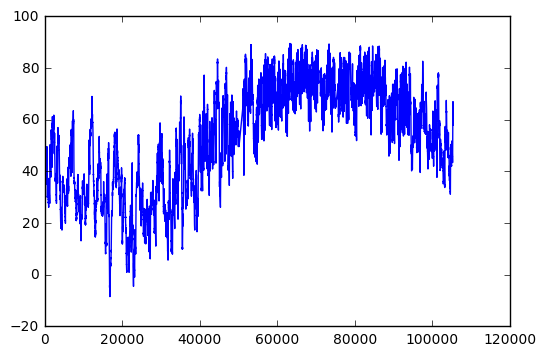

In [13]:
plt.plot(alldata2['Temperature'])

In [14]:
alldata2.isnull().values.sum().sum()

3648

There are 3648 missing values or null values in the dataframe!

In [15]:
alldata3=alldata2.interpolate()

In [16]:
alldata3.isnull().values.sum().sum()

0

In [17]:
alldata3

,Time,Temperature,Value,Hour,Weekday,DayOfYear
0,2013-11-10 05:00:00,54.43,7836.626475,5.0,6.0,314.0
1,2013-11-10 05:05:00,54.691,7867.521625,5.0,6.0,314.0
2,2013-11-10 05:10:00,54.604,7901.433225,5.0,6.0,314.0
3,2013-11-10 05:15:00,54.648,7839.236275,5.0,6.0,314.0
4,2013-11-10 05:20:00,54.648,7886.671675,5.0,6.0,314.0
5,2013-11-10 05:25:00,54.734,7860.445800,5.0,6.0,314.0
6,2013-11-10 05:30:00,54.734,7846.213475,5.0,6.0,314.0
7,2013-11-10 05:35:00,54.734,7866.558275,5.0,6.0,314.0
8,2013-11-10 05:40:00,54.604,7850.975250,5.0,6.0,314.0
9,2013-11-10 05:45:00,54.516,7807.785950,5.0,6.0,314.0


In [18]:
# fig = plt.figure() # Create matplotlib figure

# ax = fig.add_subplot(111) # Create matplotlib axes
# ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

# width = 0.4

# alldata3.Value.plot(kind='bar', color='red', ax=ax, position=1)
# alldata3.Temperature.plot(kind='bar', color='blue', ax=ax2, position=0)

# ax.set_ylabel('Value')
# ax2.set_ylabel('Temperature')

# plt.show()

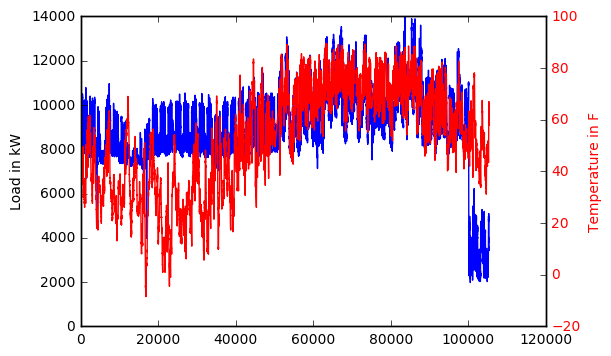

In [19]:
fig=plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(alldata3.Value)
ax1.set_ylabel('Load in kW')

ax2 = ax1.twinx()
ax2.plot(alldata3.Temperature, 'r-')
ax2.set_ylabel('Temperature in F', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
# plt.plot(alldata3.Value)
# plt.plot(alldata3.Temperature)

In [20]:
alldata4=alldata3.drop(alldata3.columns[[0,3,4,5]],axis=1)
# alldata4.isnull().sum().sum()
# alldata4.columns
alldata4.head()

,Temperature,Value
0,54.43,7836.626475
1,54.691,7867.521625
2,54.604,7901.433225
3,54.648,7839.236275
4,54.648,7886.671675


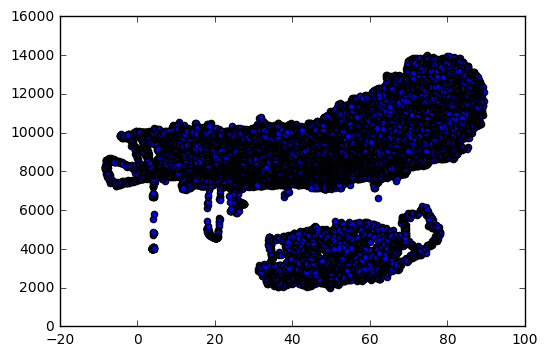

In [96]:
# alldata3.plot(kind='scatter',x='Temperature',y='Value');
# alldata3.plot.scatter(x='Value',y='Temperature',style='o')
# type(alldata3)
alldata4.Temperature=alldata4.Temperature.astype(float)
alldata4.Value=alldata4.Value.astype(float)
# plt.scatter(alldata4.Value, alldata4.Temperature,s=20,c=None)
plt.scatter(alldata4.Temperature, alldata4.Value,s=20,c=None)
# type(alldata3.Value)
# alldata4.plot(kind='scatter',x='Value',y='Temperature')

In [89]:
alldata4.Temperature=alldata4.Temperature.astype(float)
alldata4.Value=alldata4.Value.astype(float)
alldata3.Temperature=alldata4.Temperature.astype(float)
# alldata4.plot.scatter(alldata4.columns[0],alldata4.columns[1])
# plt.scatter(alldata3.Temperature,alldata4.Value)
# alldata3.dtypes

Time            object
Temperature    float64
Value          float64
Hour           float64
Weekday        float64
DayOfYear      float64
dtype: object

In [66]:
from sklearn import tree

In [91]:
clf=tree.DecisionTreeRegressor()
clf=clf.fit(alldata3[['Temperature','Hour','Weekday','DayOfYear']],alldata3['Value'])

In [92]:
print(clf.feature_importances_)

[ 0.17884026  0.14433277  0.06060318  0.61622379]


In [93]:
clf.score(alldata3[['Temperature','Hour','Weekday','DayOfYear']], alldata3['Value'])

0.99970569130730957